## Import the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset.

In [4]:
data=pd.read_csv(r"/content/insurance.csv")
df=data.copy()

In [5]:
df.head() #displays the first 5 rows of the dataset.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

Our dataset has 1338 rows and 7 features.

## Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


we have 4 numerical and 3 categorial columns.

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#check for duplicate values
dup_count=df.duplicated().sum()
print(f"There are {dup_count} duplicate values in the dataset.")

There are 1 duplicate values in the dataset.


In [10]:
#drop the duplicate value
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(1337, 7)

After droping the duplicate value now we have 1337 rows and 7 columns.

In [12]:
#check for missing/null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


As you can see, we don't have any null values in our dataset

## Exploratory Data Analysis

### Uni-variate Analysis

In [13]:
def plots(data,col):

   mean=data[col].mean() #mean
   median=data[col].median() #median
   std=data[col].std() #standard deviation
   max=data[col].max() #maximum value
   min=data[col].min() #minimum value


   print(f"5 Point Summary of {col} Attribute:\n"
   f"Mean: {mean}\n"
   f"Median: {median}\n"
   f"Standard Deviation: {std}\n"
   f"Maximum Value: {max}\n"
   f"Minimum Value: {min}\n")


   plt.figure(figsize=(12,6))
   plt.subplots_adjust(hspace=0.5,wspace=0.5)
   sns.set_palette('pastel')


   plt.subplot(2,2,1)
   sns.distplot(data[col],color='b')
   plt.title(f"{col} Density Distribution")

   plt.subplot(2,2,2)
   sns.violinplot(x=col,data=data, palette = 'tab10')
   plt.title(f"{col} Violin Plot")

   plt.subplot(2,2,3)
   sns.boxplot(x=col,data=data, palette = 'Set2')
   plt.title(f"{col} Box Plot")

   plt.subplot(2,2,4)
   sns.kdeplot(data[col], cumulative=True)
   plt.title(f"{col} Cumulative Density Distribution")

   plt.show()

5 Point Summary of age Attribute:
Mean: 39.222139117427076
Median: 39.0
Standard Deviation: 14.044332734156422
Maximum Value: 64
Minimum Value: 18



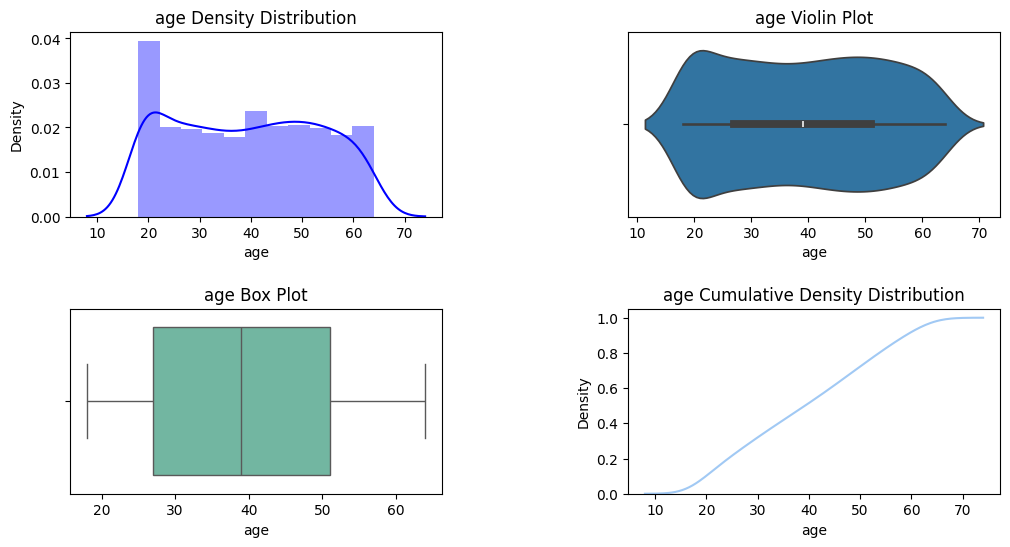

In [14]:
plots(df,'age')

### Observations
- The age distribution is bimodal and irregular, indicating two prominent age groups
-There are no outliers present in the `Age` column.


5 Point Summary of bmi Attribute:
Mean: 30.66345175766642
Median: 30.4
Standard Deviation: 6.100468409615801
Maximum Value: 53.13
Minimum Value: 15.96



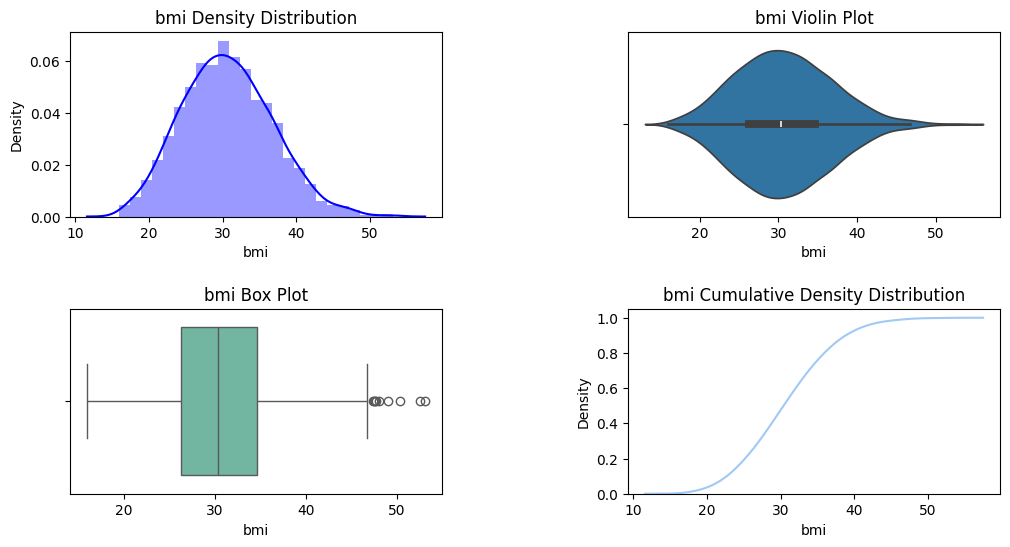

In [15]:
plots(df,'bmi')

### Observation
- The distribution of `bmi` is approximately normal with mean 30.6 and median 30.4.
- The distribution is little bit skewed to left.
- There are a few outliers in the `bmi` data. However, handling these outliers might not be appropriate, as they represent valid, real-world values rather than erroneous data points. Therefore, removing or modifying these outliers could result in the loss of important information.

5 Point Summary of charges Attribute:
Mean: 13279.121486655948
Median: 9386.1613
Standard Deviation: 12110.359656344179
Maximum Value: 63770.42801
Minimum Value: 1121.8739



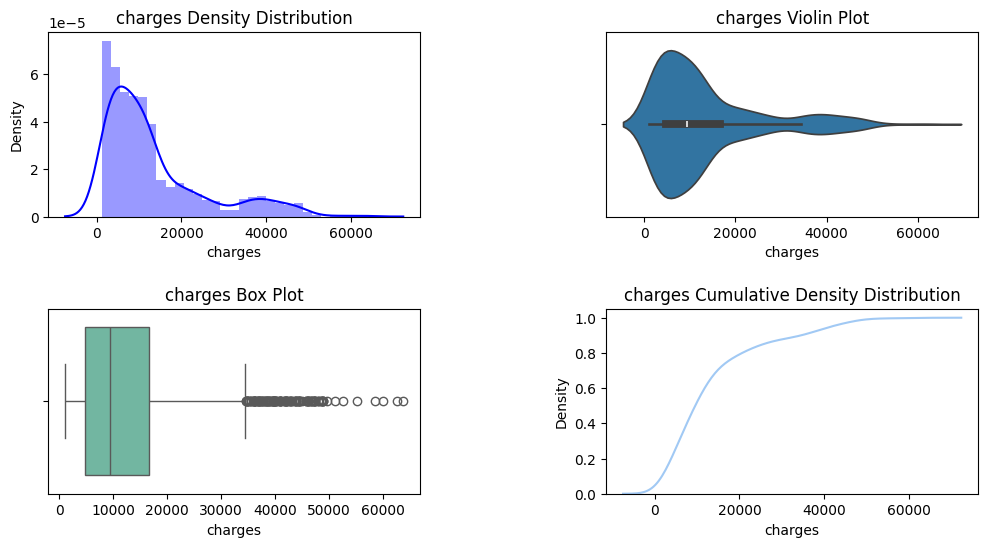

In [16]:
plots(df,'charges')

### Observation
- The distribution of `charges` is right skewed
- There are a few outliers in the `charges` data. However, handling these outliers might not be appropriate, as they represent valid, real-world values rather than erroneous data points. Therefore, removing or modifying these outliers could result in the loss of important information.

In [17]:
def cat_plots(data,col):

  plt.figure(figsize=(12,6))
  plt.subplots_adjust(hspace=0.5,wspace=0.5)

  #count plot
  plt.subplot(121)
  sns.countplot(x=col,data=data, palette = 'tab10')
  plt.title(f"{col} Count Plot")

  #pie plot
  plt.subplot(122)
  value_counts = data[col].value_counts().reset_index()
  labels = value_counts.iloc[:, 0]  # First column (index column)
  sizes = value_counts.iloc[:, 1]   # Second column (counts)
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('tab10', len(labels)))
  plt.title(f"{col} Pie Chart")

  plt.show()

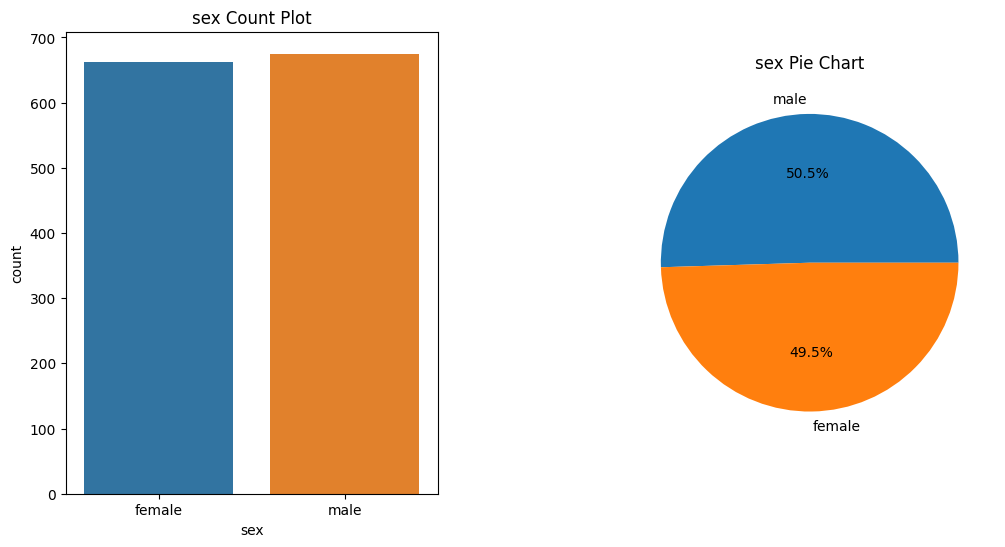

In [18]:
cat_plots(df,'sex')

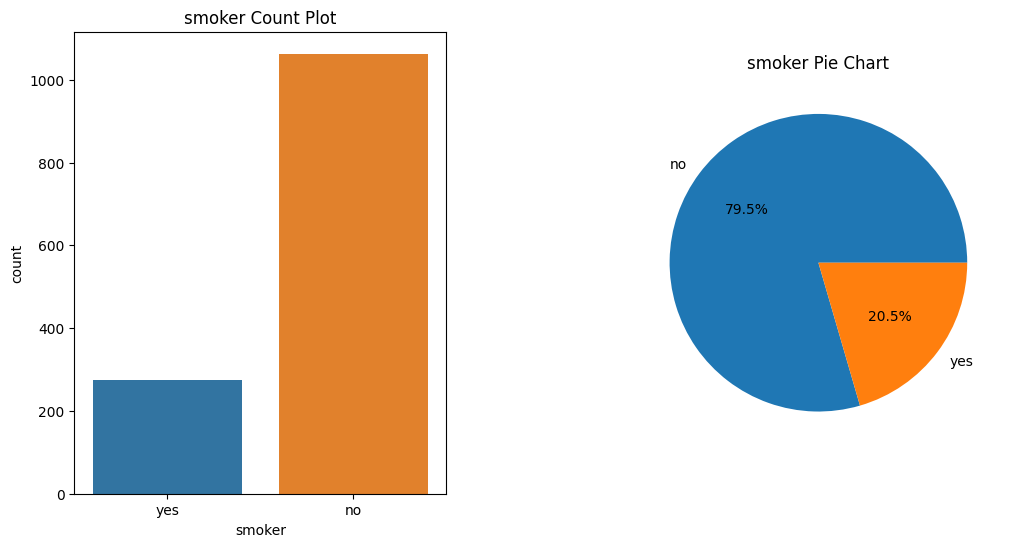

In [19]:
cat_plots(df,'smoker')

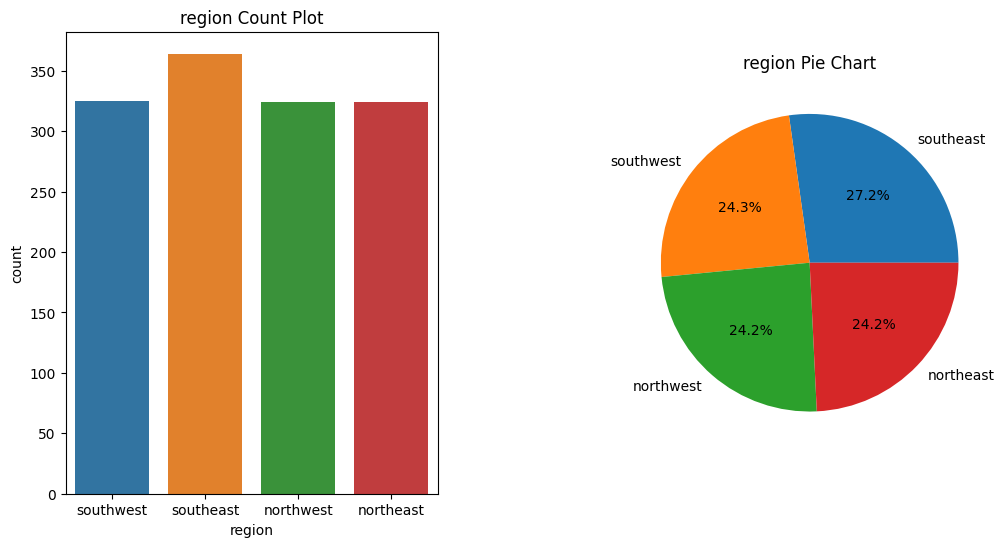

In [20]:
cat_plots(df,'region')

<Axes: xlabel='children', ylabel='count'>

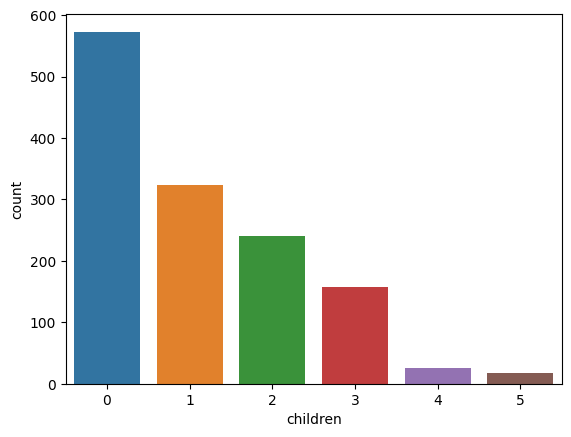

In [21]:
sns.countplot(x='children',data=df, palette = 'tab10')

### Bi-Variate analysis

In [22]:
df.groupby('smoker').mean('charges')['charges']

,charges
smoker,
no,8440.660307
yes,32050.231832


It is evident that the average charges for smokers are higher than those for non-smokers

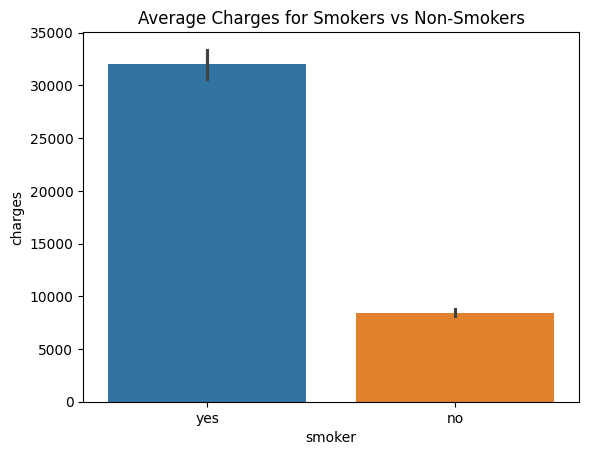

In [23]:
# Barplot for average charges based on smoker status
sns.barplot(x='smoker', y='charges', data=df, palette='tab10')

# Title and show plot
plt.title('Average Charges for Smokers vs Non-Smokers')
plt.show()

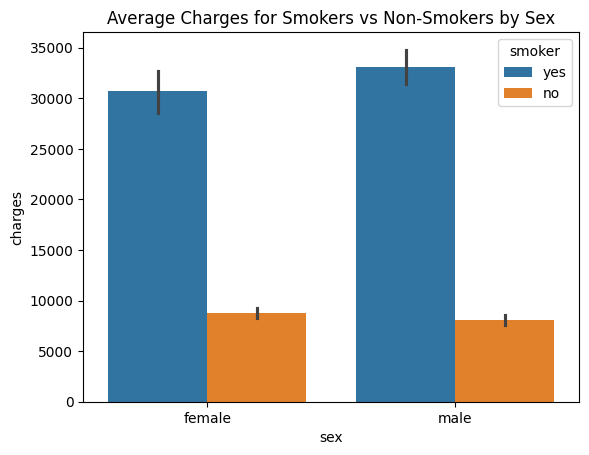

In [24]:
# Barplot for average charges based on smoker status and sex
sns.barplot(x='sex', y='charges', hue='smoker', data=df, palette='tab10')

# Title and show plot
plt.title('Average Charges for Smokers vs Non-Smokers by Sex')
plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

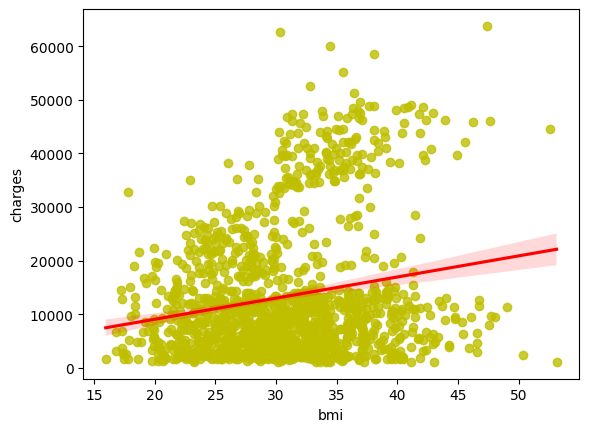

In [25]:
sns.regplot(x='bmi',y='charges',data=df,line_kws={"color": "red"},color='y')

As expected, the premium charges are higher for individuals with a high BMI

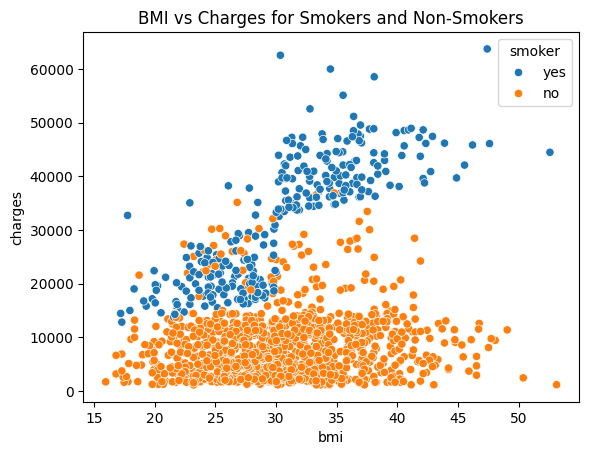

In [26]:
# Scatter plot for BMI vs Charges, color-coded by smoker status
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='tab10')

# Title and show plot
plt.title('BMI vs Charges for Smokers and Non-Smokers')
plt.show()

Apply onehot encoding to categorial values.

In [27]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns  # or manually list them

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded = df_encoded.astype(int)

In [28]:
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


### Correlation

<Axes: >

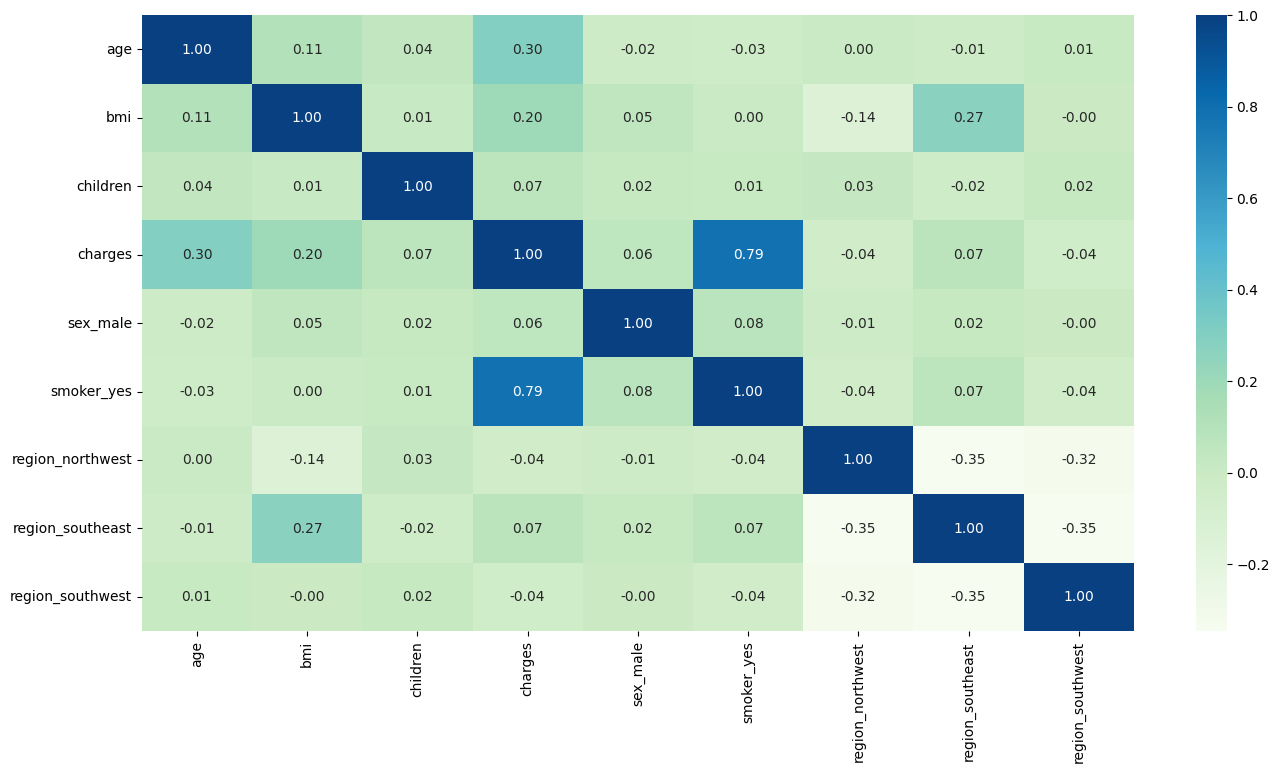

In [29]:
plt.figure(figsize=(16,8))
sns.heatmap(df_encoded.corr(),annot=True,fmt='.2f',cmap='GnBu')

### Observations:
- As expected no of childrens does not really affect the insurance charges.
- Smoker is highly correlated with insurance charges.
- Age,bmi and smoker features have good correlation with charges.

## Model buliding

In [30]:
X=df_encoded.drop('charges',axis=1)
y=df_encoded['charges']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
xgb=XGBRegressor()
svr=SVR()
knn=KNeighborsRegressor()

## model evaluation

In [33]:
from sklearn.metrics import r2_score
models={'Linear_regression':lr,'Decision_tree':dt,'Random_forest':rf,'XGBoost':xgb,'Support_vector':svr,'KNN':knn}

results=[]
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  score=model.score(X_test,y_test)
  mae=mean_absolute_error(y_test,y_pred)
  results.append({'Model':name,'Score':score,'MAE':mae})


In [34]:
res=pd.DataFrame(results)
res

,Model,Score,MAE
0,Linear_regression,0.806944,4171.800293
1,Decision_tree,0.736700,3579.684701
2,Random_forest,0.872126,2797.154317
3,XGBoost,0.850900,3117.195312
4,Support_vector,-0.134436,9252.954127
5,KNN,0.126632,8390.672388


Among all the models, Random Forest has outperformed with an accuracy of 87%.

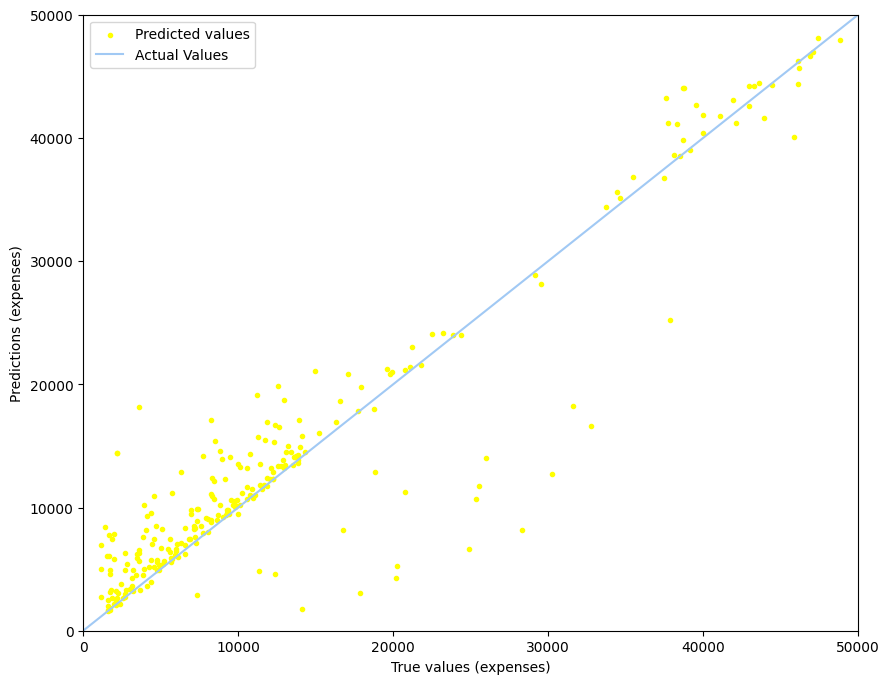

In [38]:
plt.figure(figsize=(10,8))
y_predict = rf.predict(X_test)
plt.scatter(y_test,y_predict,color='yellow',marker='.')
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
plt.legend(['Predicted values','Actual Values'])
plt.show()

### Conclusion

- Random Forest Regressor performed best with an accuracy of 87%, making it the most reliable model for predicting medical insurance charges.

- Linear Regression and XGBoost followed, with good accuracy scores of 80% and 85% respectively.

- Support Vector Machine performed poorly, indicating it's not suitable for this dataset.

- Smoking status, BMI, and age were the most influential features affecting insurance costs.